In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
dataset = pd.read_csv('transaction.csv')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [2]:
country = pd.DataFrame(dataset['Country'].value_counts())
country = country.sort_index()
country

,Country
Australia,356
Austria,88
Bahrain,3
Belgium,486
Brazil,8
Canada,36
Channel Islands,184
Cyprus,113
Czech Republic,4
Denmark,98


In [3]:
invoice_qty = pd.DataFrame(dataset.groupby(['InvoiceNo'])['Qty'].sum())
invoice_qty

,Qty
InvoiceNo,
536370,5133
536389,2800
536527,4176
536532,10000
536540,1976
...,...
581494,3791
581570,1063
581574,1361


In [4]:
invoice_country = dataset.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
invoice_country = invoice_country.set_index('InvoiceNo')
invoice_country = invoice_country[['Country']]
invoice_country

,Country
InvoiceNo,
537626,Iceland
542237,Iceland
549222,Iceland
556201,Iceland
562032,Iceland
...,...
559557,Canada
545579,Greece
555931,Malta


In [5]:
invoice_qty_country = pd.concat([invoice_qty, invoice_country], axis = 1)
invoice_qty_country

,Qty,Country
InvoiceNo,,
536370,5133,France
536389,2800,Australia
536527,4176,Germany
536532,10000,Norway
536540,1976,EIRE
...,...,...
581494,3791,Germany
581570,1063,Germany
581574,1361,Germany


In [6]:
transaksi = pd.DataFrame(dataset.groupby(['Country'])['Qty'].mean())
transaksi

,Qty
Country,
Australia,497.632022
Austria,466.397727
Bahrain,490.000000
Belgium,524.172840
Brazil,548.625000
Canada,537.472222
Channel Islands,521.543478
Cyprus,502.778761
Czech Republic,619.750000


In [7]:
cluster_i = []
cluster_val = []
for i in range(10):
    kmeans = KMeans(n_clusters = 3, init = 'random', n_init=1, max_iter=5).fit(transaksi)
    cluster_i.append(kmeans)
    cluster_val.append(kmeans.inertia_)
    print(kmeans, kmeans.inertia_)

KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8095.124159634649
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8257.151454676508
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8074.6414430780915
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8650.598826148962
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8759.282563946897
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 9677.475106181771
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 9677.475106181771
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8110.970246046107
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 9099.07839747103
KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8095.124159634649


In [8]:
index_cluster = cluster_val.index(min(cluster_val))
cluster = cluster_i[index_cluster]
print(cluster, cluster.inertia_)

KMeans(init='random', max_iter=5, n_clusters=3, n_init=1) 8074.6414430780915


In [9]:
centroid = cluster.cluster_centers_
centroid

array([[592.98333333],
       [486.74185073],
       [535.25697757]])

In [10]:
idx = np.argsort(centroid.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3)

sorted_centroid = centroid[lut]
sorted_label = lut[cluster.labels_]
print('Centroid', sorted_centroid)
print('Label', sorted_label)

Centroid [[535.25697757]
 [592.98333333]
 [486.74185073]]
Label [0 0 0 1 1 1 1 0 2 1 1 1 1 1 1 1 1 0 1 0 2 0 0 1 1 1 0 0 2 1 1 1 1 1 1 0]


In [11]:
label_index_0 = (sorted_label == 0).nonzero()
label_country_0 = transaksi.index[label_index_0]
label_index_1 = (sorted_label == 1).nonzero()
label_country_1 = transaksi.index[label_index_0]
label_index_2 = (sorted_label == 2).nonzero()
label_country_2 = transaksi.index[label_index_0]

print('Transaksi Rendah', label_country_0)
print('Transaksi Sedang', label_country_1)
print('Transaksi Tinggi', label_country_2)

Transaksi Rendah Index(['Australia', 'Austria', 'Bahrain', 'Cyprus', 'Israel', 'Japan',
       'Lithuania', 'Malta', 'Portugal', 'RSA', 'Unspecified'],
      dtype='object', name='Country')
Transaksi Sedang Index(['Australia', 'Austria', 'Bahrain', 'Cyprus', 'Israel', 'Japan',
       'Lithuania', 'Malta', 'Portugal', 'RSA', 'Unspecified'],
      dtype='object', name='Country')
Transaksi Tinggi Index(['Australia', 'Austria', 'Bahrain', 'Cyprus', 'Israel', 'Japan',
       'Lithuania', 'Malta', 'Portugal', 'RSA', 'Unspecified'],
      dtype='object', name='Country')


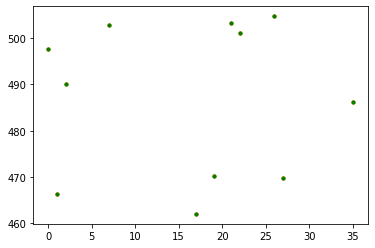

In [12]:
import matplotlib.pyplot as plt

plt.plot(label_index_2, transaksi.iloc[label_index_2].to_numpy().reshape((1,-1)),'r.')
plt.plot(label_index_1, transaksi.iloc[label_index_1].to_numpy().reshape((1,-1)),'y.')
plt.plot(label_index_0, transaksi.iloc[label_index_0].to_numpy().reshape((1,-1)),'g.')
plt.show()